/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


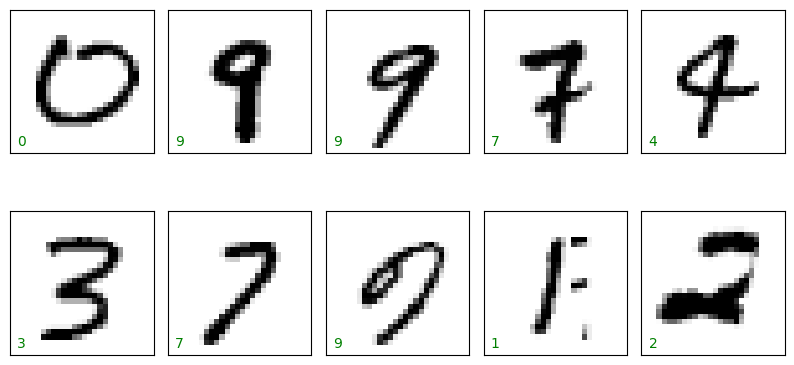

In [1]:
# Importing necessary libraries for data handling and visualization
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_openml

# Now, we will load the MNIST dataset from openml, which is a repository of openly available datasets.
# We will load a subset of the data to ensure that our computations are manageable on limited resources.

# Setting a random state for reproducibility
random_state = 42

# Fetching the MNIST dataset
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

# The dataset consists of 70,000 images. For the sake of computation time, let's work with a subset.
# We'll use 2000 images randomly selected from the dataset.
indices = np.random.choice(range(len(mnist.data)), 2000, replace=False)

# Extracting the images and labels for our subset
X = mnist.data[indices]
y = mnist.target[indices]

# Normalizing the data to have values between 0 and 1
X_normalized = X / 255.0

# We will also visualize a few images from the dataset to get a sense of what the data looks like.
# Let's plot the first few images and their labels.
fig, axes = plt.subplots(2, 5, figsize=(10, 5),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_normalized[i].reshape(28, 28), cmap='gray_r', interpolation='nearest')
    ax.text(0.05, 0.05, str(y[i]),
            transform=ax.transAxes, color='green')

# Show the plot
plt.show()

# We have now loaded and preprocessed our dataset. The next steps will involve applying t-SNE to this data
# to reduce its dimensionality and then visualizing the result. We will continue with these steps upon your instruction.

<ipython-input-3-57811a4c7d64>:23: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img_resized = img_gray.resize(target_size, Image.ANTIALIAS)


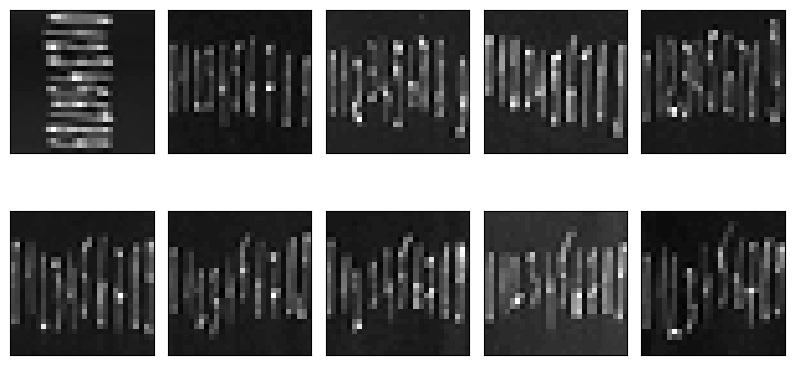

In [3]:
from PIL import Image

image_files = ['/content/black_marker.jpg',
               '/content/scan_smoothing_0.png',
               '/content/scan_smoothing_1.png',
               '/content/scan_smoothing_2.png',
               '/content/scan_smoothing_3.png',
               '/content/scan_smoothing_4.png',
               '/content/scan_smoothing_5.png',
               '/content/scan_smoothing_6.png',
               '/content/scan_smoothing_7.png',
               '/content/scan_smoothing_8.png',
               '/content/scan_smoothing_9.png',
              ]
def load_images(image_paths, target_size=(28, 28)):
  images = []
  for path in image_paths:
      # Open the image file
      with Image.open(path) as img:
          # Convert the image to grayscale
          img_gray = img.convert('L')
          # Resize to the target size (e.g., 28x28 for MNIST)
          img_resized = img_gray.resize(target_size, Image.ANTIALIAS)
          # Convert the image to a numpy array and flatten it
          img_array = np.array(img_resized).flatten()
          images.append(img_array)
  # Convert list of arrays to a 2D numpy array
  return np.vstack(images)

X_loaded = load_images(image_files)

# Normalize the data to have values between 0 and 1
X_normalized = X_loaded / 255.0

# Now we will visualize a few simulated images from the dataset.
# As these are simulated, they won't look like real digits, but we'll visualize them for the sake of the process.

# Displaying the simulated images
fig, axes = plt.subplots(2, 5, figsize=(10, 5),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_normalized[i].reshape(28, 28), cmap='gray_r', interpolation='nearest')

# Show the plot
plt.show()

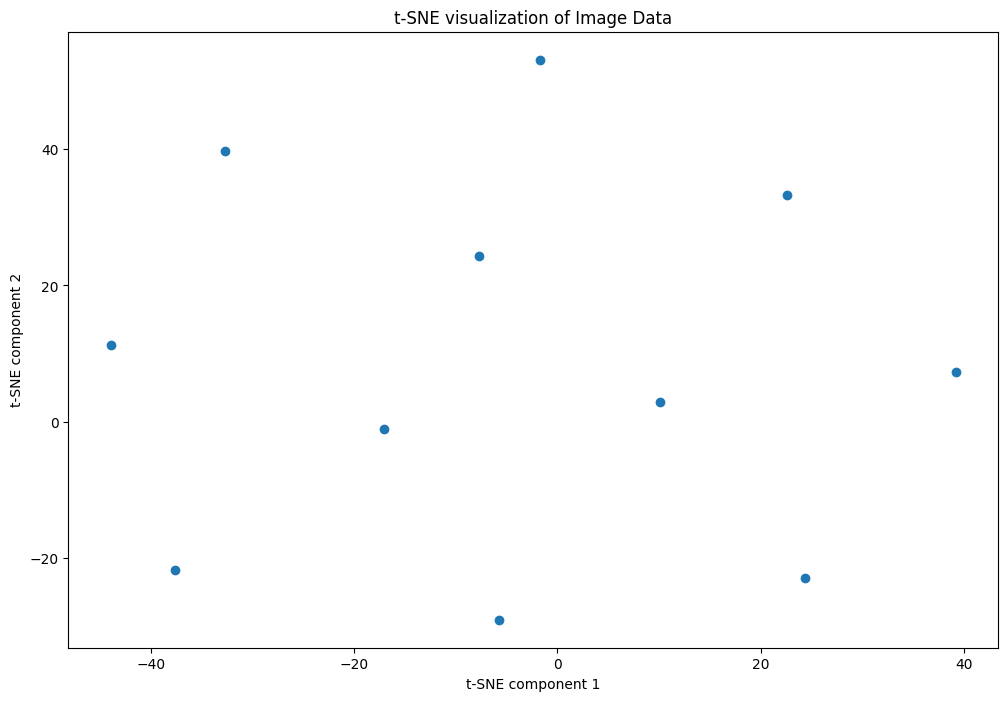

In [5]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_simulated_normalized is your preprocessed image data

# Initialize t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=10)

# Fit and transform the data
X_tsne = tsne.fit_transform(X_normalized)

# Now, let's plot the transformed data
plt.figure(figsize=(12, 8))

# Create a scatter plot of the t-SNE reduced data
# Since we don't have labels, we will plot all points the same color
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])

# Adding title and labels
plt.title('t-SNE visualization of Image Data')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')

# Show the plot
plt.show()